<br> Radley Ciego </br>
<br> GTECH 78518: Environmental Data Science </br>
<br> November 22, 2022 </br>
<br> Homework #9 </br>

In [34]:
# Import necessary packages
import os

import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import mapping

import geopandas as gpd
import rioxarray as rxr
import xarray as xr
import glob
from osgeo import gdal

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

## Open and read an image (lansat or Sentinenel-2). Subset and calculate NDVI

In [21]:
# go to data directory

pth = '/Users/radleyciego/GitHub/environmental-data-science/data/NYCimg/Sentinel-2/IMG_DATA/'
b4path = os.path.join(pth,'T18TWL_20210912T154911_B04.jp2')
b8path = os.path.join(pth, 'T18TWL_20210912T154911_B08.jp2')
# open red and NIV bands to calculate NDVI
b4 = rxr.open_rasterio(b4path,masked=True)
b8 = rxr.open_rasterio(b8path,masked=True)

In [22]:
# view crs, spatial extent, and no data values
print(b4.rio.crs)
print(b4.rio.bounds)
print(b4.rio.nodata)

EPSG:32618
<bound method XRasterBase.bounds of <rioxarray.raster_array.RasterArray object at 0x163455dc0>>
None


In [15]:
# print the minimum and maximum raster value
print(np.nanmin(b4.values))
print(np.nanmax(b4.values))

0.0
24330.0


In [16]:
b4.shape

(1, 10980, 10980)

In [17]:
b4.rio.transform()

Affine(10.0, 0.0, 499980.0,
       0.0, -10.0, 4600020.0)

In [18]:
b4 = rxr.open_rasterio(dirpath, masked=True).squeeze()
b4.shape

(10980, 10980)

(<Figure size 1000x400 with 1 Axes>, <AxesSubplot: >)

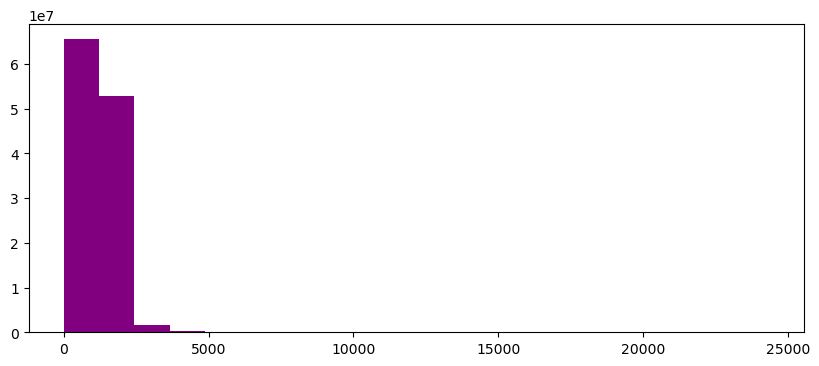

In [19]:
ep.hist(b4.values, figsize = (10, 4))

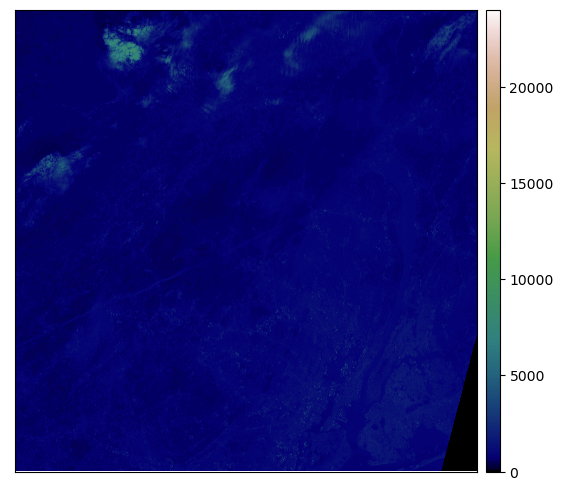

In [23]:
ep.plot_bands(b4.values, 
              cmap = 'gist_earth', 
              figsize = (10, 6), 
              cols = 1, 
              cbar = True)
plt.show()

In [24]:
# Load vector layer 
path_to_data = gpd.datasets.get_path("nybb")
nybb = gpd.read_file(path_to_data)

# nybb epsg
nybb.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [25]:
# clipping for NYBB area
b4_clipped = b4.rio.clip(nybb.geometry.apply(mapping), nybb.crs)
b4_clipped

<xarray.DataArray (band: 1, y: 3973, x: 4300)>
array([[[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        ...,
        [  nan, 1098.,  840., ...,   nan,   nan,   nan],
        [ 934., 1010.,  781., ...,   nan,   nan,   nan],
        [ 907.,  865.,  771., ...,   nan,   nan,   nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5.668e+05 5.668e+05 ... 6.097e+05 6.098e+05
  * y            (y) float64 4.53e+06 4.53e+06 4.53e+06 ... 4.49e+06 4.49e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

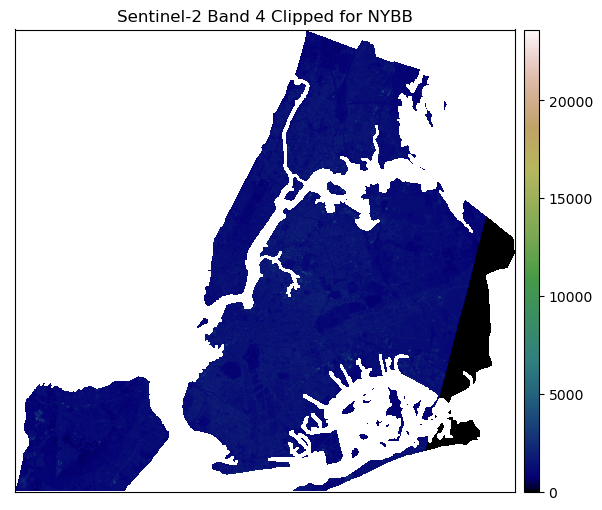

In [26]:
ep.plot_bands(b4_clipped.values, title='Sentinel-2 Band 4 Clipped for NYBB',
              cmap = 'gist_earth', 
              figsize = (10, 6), 
              cols = 1, 
              cbar = True)
plt.show()

In [31]:
# Define a function to calculate NDVI using band arrays for red, NIR bands
def ndvi(red, nir):
 return ((nir - red)/(nir + red))

In [38]:
red_link = gdal.Open(b4[0])
nir_link = gdal.Open(b8[0])

ERROR 1: Passed object is neither of type string nor bytes


RuntimeError: not a string